<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Merging-and-formating-data-sets" data-toc-modified-id="Merging-and-formating-data-sets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Merging and formating data sets</a></span></li></ul></div>

# Merging and formating data sets

In [565]:
import pandas as pd

df = pd.read_csv('Data/1hour/Precipitation/produkt_rr_stunde_19950905_20181231_01975.txt', delimiter=';')
df1 = pd.read_csv('Data/1hour/Precipitation/produkt_rr_stunde_20180531_20191201_01975.txt', delimiter=';')
df2 = pd.read_csv('Data/1hour/Pressure/produkt_p0_stunde_19490101_20181231_01975.txt', delimiter=';')
df3 = pd.read_csv('Data/1hour/Pressure/produkt_p0_stunde_20180531_20191201_01975.txt', delimiter=';')
df4 = pd.read_csv('Data/1hour/Temp_RF/produkt_tu_stunde_19490101_20181231_01975.txt', delimiter=';')
df5 = pd.read_csv('Data/1hour/Temp_RF/produkt_tu_stunde_20180531_20191201_01975.txt', delimiter=';')
df6 = pd.read_csv('Data/1hour/Cloud/produkt_cs_stunde_19490101_20181231_01975.txt', delimiter=';')
df7 = pd.read_csv('Data/1hour/Cloud/produkt_cs_stunde_20180531_20191201_01975.txt', delimiter=';')

//anaconda3/envs/nf/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6,10,14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [566]:
df8 = pd.read_csv('Data/1hour/Dew/produkt_td_stunde_19490101_20181231_01975.txt', delimiter=';')
df9 = pd.read_csv('Data/1hour/Dew/produkt_td_stunde_20180531_20191201_01975.txt', delimiter=';')
df_dew = pd.concat([df8,df9],axis=0)

In [567]:
df10 = pd.read_csv('Data/1hour/Cloudiness/produkt_n_stunde_19490101_20181231_01975.txt', delimiter=';')
df11= pd.read_csv('Data/1hour/Cloudiness/produkt_n_stunde_20180531_20191201_01975.txt', delimiter=';')
df_cloudiness = pd.concat([df10,df11],axis=0)

In [568]:
df12 = pd.read_csv('Data/1hour/Soil_temp/produkt_eb_stunde_19610101_20181231_01975.txt', delimiter=';')
df13= pd.read_csv('Data/1hour/Soil_temp/produkt_eb_stunde_20180531_20191201_01975.txt', delimiter=';')
df_soil = pd.concat([df12,df13],axis=0)

In [569]:
df14 = pd.read_csv('Data/1hour/Visibilaty/produkt_vv_stunde_19490101_20181231_01975.txt', delimiter=';')
df15= pd.read_csv('Data/1hour/Visibilaty/produkt_vv_stunde_20180531_20191201_01975.txt', delimiter=';')
df_vis = pd.concat([df14,df15],axis=0)

In [570]:
df16 = pd.read_csv('Data/1hour/Sun/produkt_sd_stunde_19490101_20181231_01975.txt', delimiter=';')
df17= pd.read_csv('Data/1hour/Sun/produkt_sd_stunde_20180531_20191201_01975.txt', delimiter=';')
df_sun = pd.concat([df16,df17],axis=0)

In [571]:
df_solar = pd.read_csv('Data/1hour/Solar/produkt_st_stunde_20050101_20191031_01975.txt', delimiter=';')



In [572]:
df18 = pd.read_csv('Data/1hour/Wind/produkt_f_stunde_19490101_20181231_01975.txt', delimiter=';')
df19= pd.read_csv('Data/1hour/Wind/produkt_f_stunde_20180531_20191201_01975.txt', delimiter=';')
df_windf = pd.concat([df18,df19],axis=0)

In [573]:
df20 = pd.read_csv('Data/1hour/Wind/produkt_ff_stunde_19500101_20181231_01975.txt', delimiter=';')
df21= pd.read_csv('Data/1hour/Wind/produkt_ff_stunde_20180531_20191201_01975.txt', delimiter=';')
df_windff = pd.concat([df18,df19],axis=0)

In [574]:
df_rain=pd.concat([df,df1],axis=0)
df_rain
df_press =pd.concat([df2,df3],axis=0)
df_press
df_temp=pd.concat([df4,df5],axis=0)
df_temp
df_cloud = pd.concat([df6,df7],axis=0)

In [575]:
liste = []
for i in df_solar.MESS_DATUM:
    liste.append(i.replace('','')[:-3])
    

In [576]:
df_solar=df_solar.drop(columns=['MESS_DATUM'])
liste=pd.DataFrame(liste)
liste['MESS_DATUM']=pd.DataFrame(liste)
liste = liste.iloc[:,1]
liste=liste.astype(int)
df_solar = pd.concat([liste,df_solar],axis=1)
df_solar.head()



,MESS_DATUM,STATIONS_ID,QN_592,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,MESS_DATUM_WOZ,eor
0,2005010100,1975,1,120.0,0.0,0.0,0,148.86,2005010101:00,eor
1,2005010101,1975,1,100.0,0.0,0.0,0,144.98,2005010102:00,eor
2,2005010102,1975,1,89.0,0.0,0.0,0,138.39,2005010103:00,eor
3,2005010103,1975,1,104.0,0.0,0.0,0,130.31,2005010104:00,eor
4,2005010104,1975,1,111.0,0.0,0.0,0,121.57,2005010105:00,eor


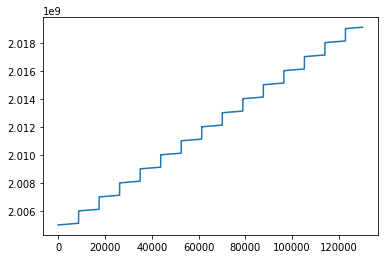

In [577]:
import matplotlib.pyplot as plt
plt.plot(df_solar.MESS_DATUM)

In [578]:
mess = df_solar['MESS_DATUM']
mess = pd.DataFrame(mess)
mess = mess.rename(columns={"MESS_DATUM": "a"})
df_solar = pd.concat([mess,df_solar],axis=1)
df_solar=df_solar.drop(columns=['STATIONS_ID','QN_592','eor','MESS_DATUM_WOZ'])
df_solar=df_solar.drop_duplicates()
df_solar.head()
#df_solar['MESS_DATUM'] = df_solar.MESS_DATUM.astype(str)
#df_solar.reset_index(inplace=True,drop=True)
#df_solar.MESS_DATUM = pd.to_datetime(df_solar.MESS_DATUM, format='%Y%m%d%H')

#df_solar = df_solar.set_index('MESS_DATUM')
#df_solar.head()

,a,MESS_DATUM,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT
0,2005010100,2005010100,120.0,0.0,0.0,0,148.86
1,2005010101,2005010101,100.0,0.0,0.0,0,144.98
2,2005010102,2005010102,89.0,0.0,0.0,0,138.39
3,2005010103,2005010103,104.0,0.0,0.0,0,130.31
4,2005010104,2005010104,111.0,0.0,0.0,0,121.57


In [579]:
df_solar['MESS_DATUM'] = df_solar.MESS_DATUM.astype(str)
df_solar.reset_index(inplace=True,drop=True)
df_solar.MESS_DATUM = pd.to_datetime(df_solar.MESS_DATUM, format='%Y%m%d%H')

df_solar = df_solar.set_index('MESS_DATUM')
df_solar.head()

,a,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT
MESS_DATUM,,,,,,
2005-01-01 00:00:00,2005010100,120.0,0.0,0.0,0,148.86
2005-01-01 01:00:00,2005010101,100.0,0.0,0.0,0,144.98
2005-01-01 02:00:00,2005010102,89.0,0.0,0.0,0,138.39
2005-01-01 03:00:00,2005010103,104.0,0.0,0.0,0,130.31
2005-01-01 04:00:00,2005010104,111.0,0.0,0.0,0,121.57


In [580]:
df_rain = df_rain.drop(columns=['STATIONS_ID','QN_8','eor','RS_IND','WRTR'])
df_rain.columns = df_rain.columns.str.replace('  ', '')
df_rain['MESS_DATUM'] = df_rain.MESS_DATUM.astype(str)
df_rain.reset_index(inplace=True,drop=True)
df_rain.MESS_DATUM = pd.to_datetime(df_rain.MESS_DATUM, format='%Y%m%d%H')
df_rain = df_rain.set_index('MESS_DATUM')
#df_rain = df_rain.drop_duplicates()


In [581]:
test = df_solar.join(df_rain)
test = test.drop_duplicates()
test.shape

(129988, 7)

In [582]:
df_temp = df_temp.drop(columns=['STATIONS_ID','QN_9','eor'])
df_temp['MESS_DATUM'] = df_temp.MESS_DATUM.astype(str)
df_temp.reset_index(inplace=True,drop=True)
df_temp.MESS_DATUM = pd.to_datetime(df_temp.MESS_DATUM, format='%Y%m%d%H')
df_temp = df_temp.set_index('MESS_DATUM')


In [583]:
test.shape

(129988, 7)

In [584]:
df_all = test.join(df_temp, how='left')
df_all = df_all.drop_duplicates()
df_all.head()
#test = test.drop(columns='a')
#df_all= test.merge(df_temp, left_on='MESS_DATUM', right_on='MESS_DATUM')
#df_all = df_all.drop_duplicates()
#df_all

,a,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU
MESS_DATUM,,,,,,,,,
2005-01-01 00:00:00,2005010100,120.0,0.0,0.0,0,148.86,0.0,4.7,95.0
2005-01-01 01:00:00,2005010101,100.0,0.0,0.0,0,144.98,0.1,4.3,95.0
2005-01-01 02:00:00,2005010102,89.0,0.0,0.0,0,138.39,0.0,3.1,96.0
2005-01-01 03:00:00,2005010103,104.0,0.0,0.0,0,130.31,0.0,2.8,100.0
2005-01-01 04:00:00,2005010104,111.0,0.0,0.0,0,121.57,0.0,2.2,97.0


In [585]:
df_dew.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_8', '  TT', '  TD', 'eor'], dtype='object')

In [586]:
df_dew = df_dew.drop(columns=['STATIONS_ID','QN_8','eor','  TT'])
df_dew['MESS_DATUM'] = df_dew.MESS_DATUM.astype(str)
df_dew.reset_index(inplace=True,drop=True)
df_dew.MESS_DATUM = pd.to_datetime(df_dew.MESS_DATUM, format='%Y%m%d%H')

df_dew = df_dew.set_index('MESS_DATUM')
df_dew.columns = df_dew.columns.str.replace('  ', '')



In [587]:
df_all = df_all.join(df_dew)
df_all.shape

(135148, 10)

In [588]:
df_all = df_all.drop_duplicates() 
df_all.shape

(129988, 10)

In [589]:
df_cloudiness.head()

,STATIONS_ID,MESS_DATUM,QN_8,V_N_I,V_N,eor
0,1975,1949010100,1,P,0,eor
1,1975,1949010101,1,P,8,eor
2,1975,1949010102,1,P,8,eor
3,1975,1949010103,1,P,0,eor
4,1975,1949010104,1,P,4,eor


In [590]:
df_cloudiness = df_cloudiness.drop(columns=['STATIONS_ID','QN_8','eor','V_N_I'])

df_cloudiness['MESS_DATUM'] = df_cloudiness.MESS_DATUM.astype(str)
df_cloudiness.reset_index(inplace=True,drop=True)
df_cloudiness.MESS_DATUM = pd.to_datetime(df_cloudiness.MESS_DATUM, format='%Y%m%d%H')

df_cloudiness = df_cloudiness.set_index('MESS_DATUM')
df_cloudiness.columns = df_cloudiness.columns.str.replace(' ', '')
df_cloudiness.columns


# Bedeckungsgrad aller Wolken 1/8, nicht erkennbar -1

Index(['V_N'], dtype='object')

In [591]:
df_all = df_all.join(df_cloudiness)
df_all = df_all.drop_duplicates()
df_all.shape

(129988, 11)

In [592]:
df_cloud.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_8', ' V_N', 'V_N_I', 'V_S1_CS',
       'V_S1_CSA', 'V_S1_HHS', 'V_S1_NS', 'V_S2_CS', 'V_S2_CSA', 'V_S2_HHS',
       'V_S2_NS', 'V_S3_CS', 'V_S3_CSA', 'V_S3_HHS', 'V_S3_NS', 'V_S4_CS',
       'V_S4_CSA', 'V_S4_HHS', 'V_S4_NS', 'eor'],
      dtype='object')

In [593]:
df_cloud = pd.concat([df6,df7],axis=0)
df_cloud = df_cloud.drop(columns=['STATIONS_ID','QN_8','eor',' V_N','V_N_I'])
df_cloud['MESS_DATUM'] = df_cloud.MESS_DATUM.astype(str)
df_cloud = df_cloud.drop_duplicates()
df_cloud.reset_index(inplace=True,drop=True)
df_cloud.MESS_DATUM = pd.to_datetime(df_cloud.MESS_DATUM, format='%Y%m%d%H')
df_cloud = df_cloud.drop_duplicates()
df_cloud = df_cloud.set_index('MESS_DATUM')
df_cloud = df_cloud.drop_duplicates()
df_cloud.columns = df_cloud.columns.str.replace('  ', '')
df_cloud.columns
# -999, SC-999

Index(['V_S1_CS', 'V_S1_CSA', 'V_S1_HHS', 'V_S1_NS', 'V_S2_CS', 'V_S2_CSA',
       'V_S2_HHS', 'V_S2_NS', 'V_S3_CS', 'V_S3_CSA', 'V_S3_HHS', 'V_S3_NS',
       'V_S4_CS', 'V_S4_CSA', 'V_S4_HHS', 'V_S4_NS'],
      dtype='object')

In [608]:
df_all2 = df_all.join(df_cloud)
#df_all2= df_all.merge(df_cloud, left_on='MESS_DATUM', right_on='MESS_DATUM')
#df_all2 = df_all.merge(df_cloud, how='inner', left_index=True, right_index=True)

df_all2 = df_all2.drop_duplicates(subset='a')
df_all2.shape

(129984, 27)

In [610]:
df_press.columns

Index(['STATIONS_ID', 'MESS_DATUM', 'QN_8', '   P', '  P0', 'eor'], dtype='object')

In [611]:
df_press = df_press.drop(columns=['STATIONS_ID','QN_8','eor','  P0'])
df_press = df_press.drop_duplicates()

df_press['MESS_DATUM'] = df_press.MESS_DATUM.astype(str)
df_press.reset_index(inplace=True,drop=True)
df_press.MESS_DATUM = pd.to_datetime(df_press.MESS_DATUM, format='%Y%m%d%H')

df_press = df_press.set_index('MESS_DATUM')
df_press.columns = df_press.columns.str.replace('   ', '')
df_press.columns

Index(['P'], dtype='object')

In [613]:
df_all = df_all2.join(df_press)
df_all.shape

(129984, 28)

In [614]:
df_sun = df_sun.drop(columns=['STATIONS_ID','QN_7','eor'])
df_sun = df_sun.drop_duplicates()

df_sun['MESS_DATUM'] = df_sun.MESS_DATUM.astype(str)
df_sun.reset_index(inplace=True,drop=True)
df_sun.MESS_DATUM = pd.to_datetime(df_sun.MESS_DATUM, format='%Y%m%d%H')

df_sun = df_sun.set_index('MESS_DATUM')
df_sun.columns

# NaN

Index(['SD_SO'], dtype='object')

In [615]:
df_all = df_all.join(df_sun)
df_all.shape

(129984, 29)

In [616]:
df_windff = df_windff.drop(columns=['STATIONS_ID','QN_8','eor'])
df_windff = df_windff.drop_duplicates()

df_windff['MESS_DATUM'] = df_windff.MESS_DATUM.astype(str)
df_windff.reset_index(inplace=True,drop=True)
df_windff.MESS_DATUM = pd.to_datetime(df_windff.MESS_DATUM, format='%Y%m%d%H')

df_windff = df_windff.set_index('MESS_DATUM')
df_windff.columns = df_windff.columns.str.replace(' ', '')
df_windff.columns


Index(['FF', 'DD'], dtype='object')

In [617]:
df_all = df_all.join(df_windff)
df_all.shape

(129984, 31)

In [620]:
#df_soil = df_soil.drop(columns=['STATIONS_ID','QN_2','eor'])
df_soil = df_soil.drop_duplicates()

df_soil['MESS_DATUM'] = df_soil.MESS_DATUM.astype(str)
df_soil.reset_index(inplace=True,drop=True)
df_soil.MESS_DATUM = pd.to_datetime(df_soil.MESS_DATUM, format='%Y%m%d%H')


df_soil = df_soil.set_index('MESS_DATUM')
df_soil.columns

Index(['V_TE002', 'V_TE005', 'V_TE010', 'V_TE020', 'V_TE050', 'V_TE100'], dtype='object')

In [621]:
df_all = df_all.join(df_soil)
df_all.shape

(129984, 37)

In [622]:
df_vis = df_vis.drop(columns=['STATIONS_ID','QN_8','eor','V_VV_I'])
df_vis = df_vis.drop_duplicates()

df_vis['MESS_DATUM'] = df_vis.MESS_DATUM.astype(str)
df_vis.reset_index(inplace=True,drop=True)
df_vis.MESS_DATUM = pd.to_datetime(df_vis.MESS_DATUM, format='%Y%m%d%H')

df_vis = df_vis.set_index('MESS_DATUM')
df_vis.columns

Index(['V_VV'], dtype='object')

In [623]:
df_all = df_all.join(df_vis)
df_all.shape

(129984, 38)

In [627]:
df_all.to_csv(r'weather_data.csv')

In [628]:
pd.set_option('display.max_columns', df_all.shape[1])


In [629]:
df_all

,a,ATMO_LBERG,FD_LBERG,FG_LBERG,SD_LBERG,ZENIT,R1,TT_TU,RF_TU,TD,V_N,V_S1_CS,V_S1_CSA,V_S1_HHS,V_S1_NS,V_S2_CS,V_S2_CSA,V_S2_HHS,V_S2_NS,V_S3_CS,V_S3_CSA,V_S3_HHS,V_S3_NS,V_S4_CS,V_S4_CSA,V_S4_HHS,V_S4_NS,P,SD_SO,FF,DD,V_TE002,V_TE005,V_TE010,V_TE020,V_TE050,V_TE100,V_VV
MESS_DATUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:00:00,2005010100,120.0,0.0,0.0,0,148.86,0.0,4.7,95.0,4.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1020.2,NaN,2.2,350,-999.0,5.6,5.5,5.2,4.6,5.2,2000.0
2005-01-01 01:00:00,2005010101,100.0,0.0,0.0,0,144.98,0.1,4.3,95.0,3.6,7.0,7.0,ST-999,90.0,1.0,6.0,SC-999,1050.0,7.0,-999.0,-999,-999.0,-999.0,-999.0,-999,-999.0,-999.0,1020.5,NaN,1.5,310,-999.0,5.3,5.4,5.2,4.6,5.1,3500.0
2005-01-01 02:00:00,2005010102,89.0,0.0,0.0,0,138.39,0.0,3.1,96.0,2.5,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.3,NaN,1.5,280,-999.0,4.7,5.1,5.1,4.6,5.1,800.0
2005-01-01 03:00:00,2005010103,104.0,0.0,0.0,0,130.31,0.0,2.8,100.0,2.8,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.7,0.0,2.5,290,-999.0,4.1,4.8,5.1,4.7,5.2,300.0
2005-01-01 04:00:00,2005010104,111.0,0.0,0.0,0,121.57,0.0,2.2,97.0,1.8,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.5,0.0,0.8,210,-999.0,3.8,4.5,4.9,4.7,5.2,300.0
2005-01-01 05:00:00,2005010105,115.0,0.0,0.0,0,112.70,0.0,1.9,98.0,1.6,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022.1,0.0,2.0,240,-999.0,3.7,4.2,4.7,4.7,5.2,200.0
2005-01-01 06:00:00,2005010106,113.0,0.0,0.0,0,104.08,0.0,2.0,98.0,1.7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1022.0,0.0,2.3,220,-999.0,3.7,4.2,4.7,4.8,-999.0,3500.0
2005-01-01 07:00:00,2005010107,114.0,0.0,0.0,0,96.06,0.0,2.7,100.0,2.7,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.8,0.0,2.8,210,-999.0,3.6,4.0,4.5,4.7,5.2,4500.0
2005-01-01 08:00:00,2005010108,117.0,3.0,3.0,0,88.98,0.2,3.7,100.0,3.7,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1021.7,0.0,3.4,210,-999.0,3.6,4.0,4.5,4.7,5.2,1800.0
